In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import f_oneway,f as F
from scipy.stats import kruskal
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('data/churn.xlsx')

In [4]:
varc = [v for v in df.columns if v[:2]=='V_']
contraste = 'TARGET'

array([[<AxesSubplot:title={'center':'V_ACCT_LGHT'}>,
        <AxesSubplot:title={'center':'V_N_VM_MESS'}>,
        <AxesSubplot:title={'center':'V_T_DAY_CHG'}>],
       [<AxesSubplot:title={'center':'V_T_EVE_CALLS'}>,
        <AxesSubplot:title={'center':'V_T_EVE_CHG'}>,
        <AxesSubplot:title={'center':'V_T_NIG_CALLS'}>],
       [<AxesSubplot:title={'center':'V_T_NIG_CHG'}>,
        <AxesSubplot:title={'center':'V_T_INT_CALLS'}>,
        <AxesSubplot:title={'center':'V_T_INT_CHG'}>],
       [<AxesSubplot:title={'center':'V_CS_CALLS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

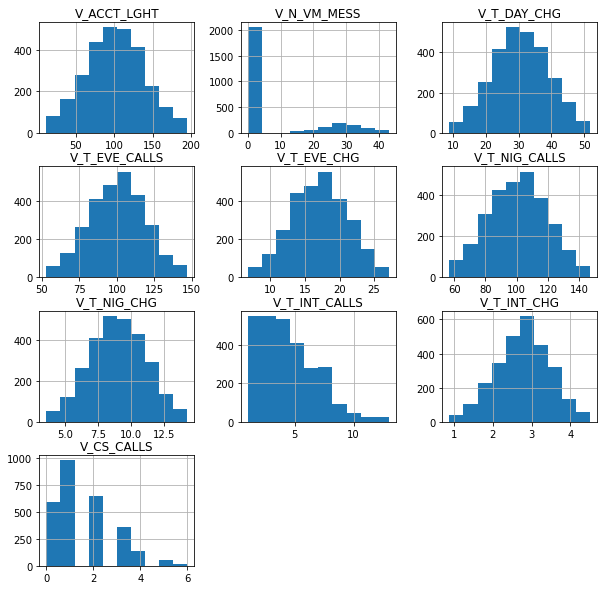

In [5]:
df[varc].hist(figsize=(10,10))

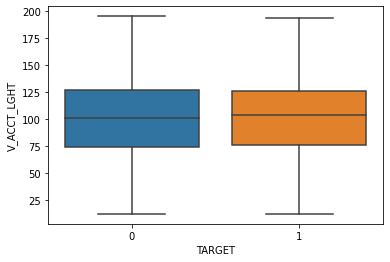

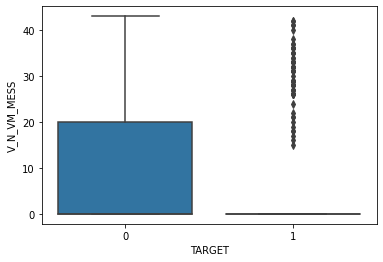

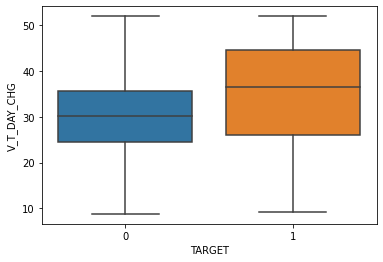

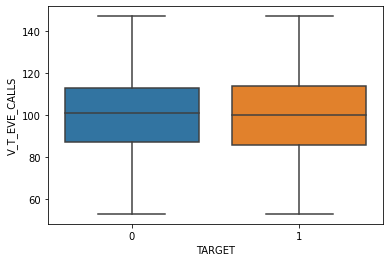

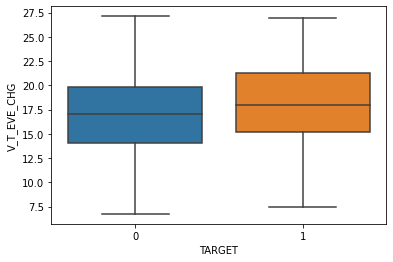

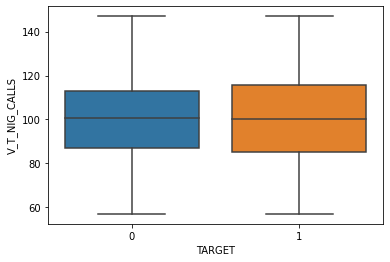

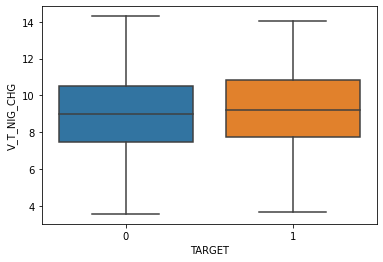

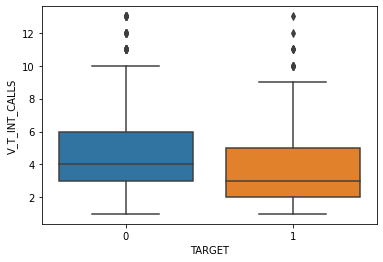

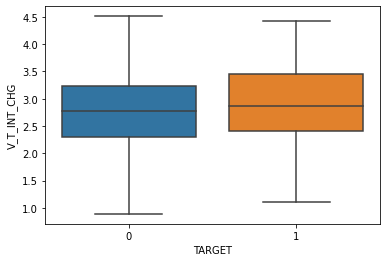

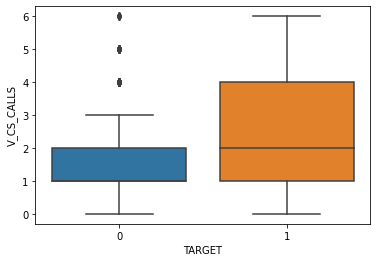

In [6]:
for v in varc:
    plt.figure()
    sns.boxplot(x=contraste,y=v,data=df)

In [7]:
for v in varc:
    print(v)
    print(f_oneway(*[d[v] for _,d in df[[contraste,v]].groupby(contraste)]))
    print()

V_ACCT_LGHT
F_onewayResult(statistic=0.3042890987715714, pvalue=0.5812499861431928)

V_N_VM_MESS
F_onewayResult(statistic=17.934989492205467, pvalue=2.359515987561625e-05)

V_T_DAY_CHG
F_onewayResult(statistic=96.1503747691985, pvalue=2.427579366944757e-22)

V_T_EVE_CALLS
F_onewayResult(statistic=0.11407461500560535, pvalue=0.7355774188543696)

V_T_EVE_CHG
F_onewayResult(statistic=22.575169572004853, pvalue=2.122763224421806e-06)

V_T_NIG_CALLS
F_onewayResult(statistic=0.04395763762403302, pvalue=0.8339477060556223)

V_T_NIG_CHG
F_onewayResult(statistic=4.598136202410552, pvalue=0.03209261029337558)

V_T_INT_CALLS
F_onewayResult(statistic=16.944884857650234, pvalue=3.959336302348041e-05)

V_T_INT_CHG
F_onewayResult(statistic=9.906009520902314, pvalue=0.0016647261631139044)

V_CS_CALLS
F_onewayResult(statistic=120.41785968089567, pvalue=1.8433599591990502e-27)



In [25]:
aux = pd.DataFrame(map(lambda v:tuple(kruskal(*[d[v] for _,d in df[[contraste,v]].groupby(contraste)]))+(v,),
                 varc),columns=['estadígrafo','p-value','variable'])
aux.sort_values(by='p-value',inplace=True)
aux.loc[aux['p-value']<=0.05]['variable'].to_list()

['V_T_DAY_CHG',
 'V_CS_CALLS',
 'V_T_INT_CALLS',
 'V_T_EVE_CHG',
 'V_N_VM_MESS',
 'V_T_INT_CHG',
 'V_T_NIG_CHG']

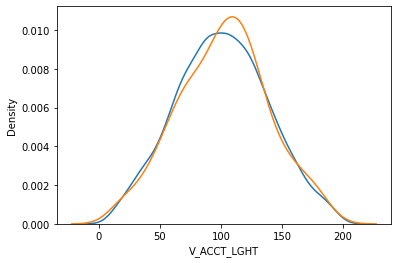

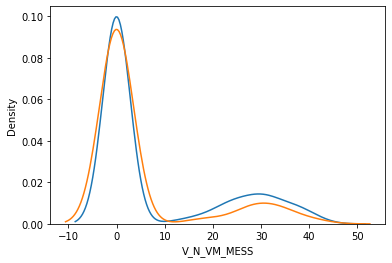

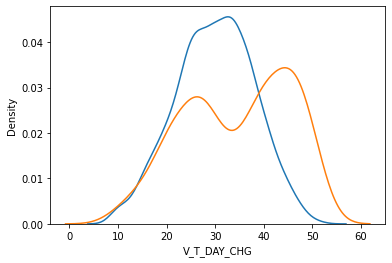

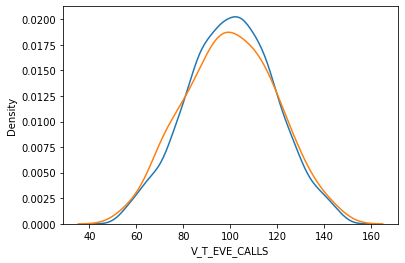

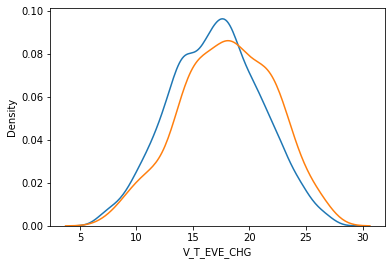

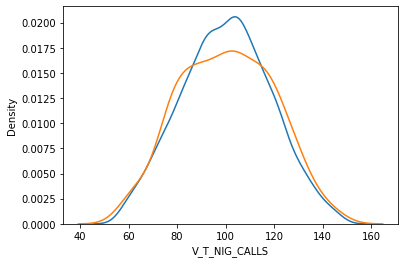

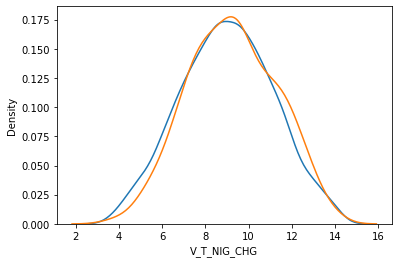

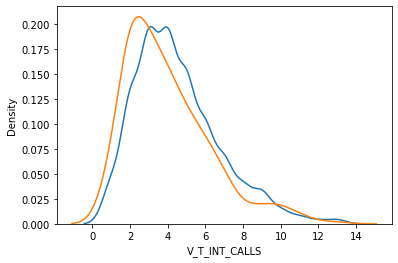

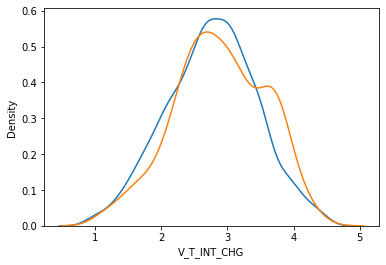

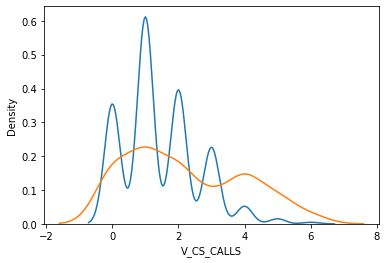

In [15]:
for v in varc:
    plt.figure()
    for _,d in df[[contraste,v]].groupby(contraste):
        sns.distplot(d[v],hist=False)

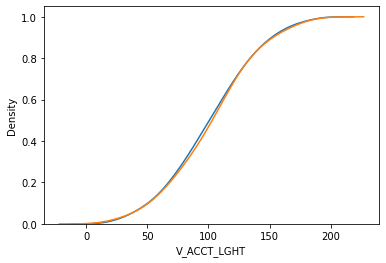

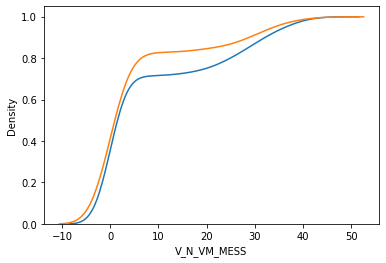

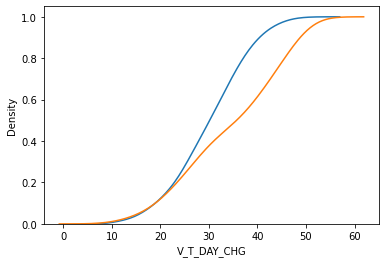

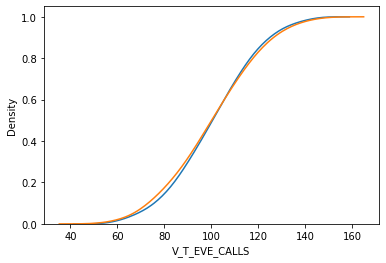

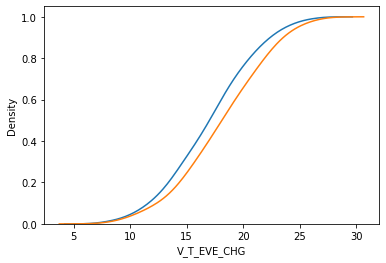

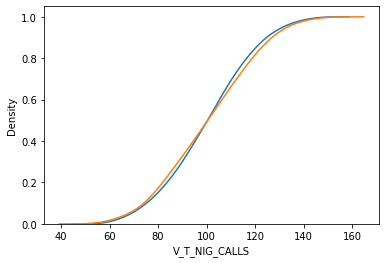

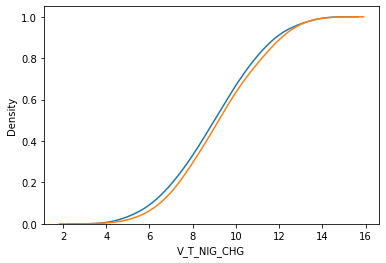

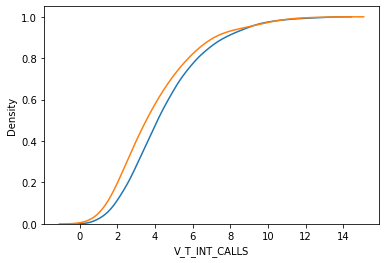

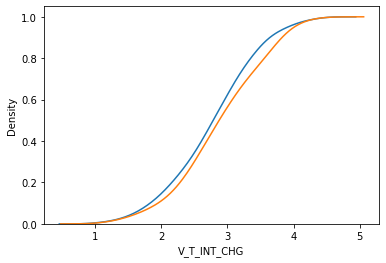

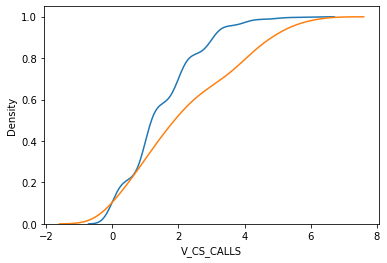

In [16]:
for v in varc:
    plt.figure()
    for _,d in df[[contraste,v]].groupby(contraste):
        sns.distplot(d[v],hist=False,kde_kws={'cumulative':True})

In [17]:
from sklearn.feature_selection import SelectKBest

In [18]:
sk = SelectKBest(k=4)

In [20]:
X,y = df[varc],df[contraste]

In [21]:
sk.fit(X,y)

SelectKBest(k=4)

In [23]:
[x for x,y in zip(varc,sk.get_support()) if y]

['V_N_VM_MESS', 'V_T_DAY_CHG', 'V_T_EVE_CHG', 'V_CS_CALLS']